# Student Alcohol Usage and Grades

In this notebook you will perform exploratory data analysis on a dataset from Kaggle about student alcohol usage, grades and other personal and family background information. The dataset can be found here:

https://www.kaggle.com/uciml/student-alcohol-consumption

This page also contains a description of the measured variables. After each visualization you will be asked to draw conclusions based on the visualization. You will write those conclusions in complete sentences. Imagine yourself presenting this notebook to the school board members, who are not intereste in code and data. Your conclusions should be written so that an audience such as this could make informed decisions from your analysis.

## Imports

In [2]:
from altair import *
import pandas as pd

## Data

Here we import the data as a Pandas `DataFrame`:

In [3]:
students = pd.read_csv('/data/student-alcohol-consumption/student-mat.csv')

In [4]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
len(students)

395

In [6]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## What things are correlated with alchohol usage?

The first things we will explore is alcohol usage. There are a number of variables in this dataset that may display covariation or correlation with alcohol usage. Before exploring these things, create a new variable for total alcohol usage (sum of the workday and weekend alcohol usage). Name this new column `Talc` in the `DataFrame` `Talc`:

In [7]:
students['Talc'] = students.Walc + students.Dalc

In [8]:
assert 'Talc' in students.columns
assert students.Talc.dtype==int

In [9]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Talc'],
      dtype='object')

In the next cell create a visualization that shows the variation of total alcohol usage:

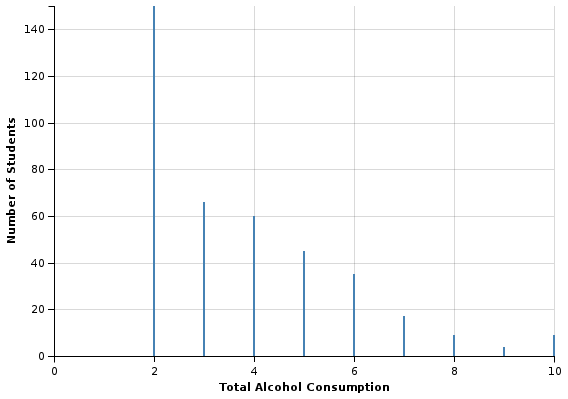

In [10]:
Chart(students).mark_bar().encode(
    X('Talc', title='Total Alcohol Consumption'),
    Y('count(*)', title='Number of Students')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

It would appear that none of the participants do not drink entirely and the majority of the students consume from 2 to 6 drinks a week.

In the next cell, create a visualization that helps answer the following question:

> Does internet access at home show covariation with alcohol usage?

In [11]:
students['internet'].head()

0     no
1    yes
2    yes
3    yes
4     no
Name: internet, dtype: object

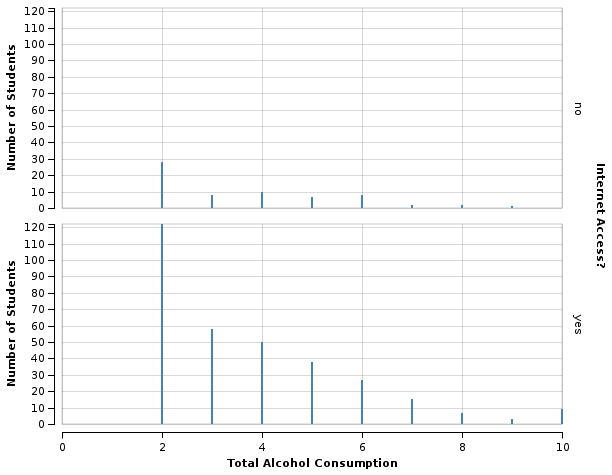

In [14]:
Chart(students).mark_bar().encode(
    X('Talc', title='Total Alcohol Consumption'),
    Y('count(*)', title='Number of Students'),
    Row('internet', title='Internet Access?')
).configure_cell(height=200)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

There seems to be a very obvious increase in alcohol consumption for those who have internet access compared to those who do not. That is, having internet access triples the amount of students that consume a given number of drinks per week.

In the next cell, create a visualization that helps answers the following question:

> Is going out with friends correlated with total alcohol usage? 

In [12]:
students['goout'].head()

0    4
1    3
2    2
3    2
4    2
Name: goout, dtype: int64

In [13]:
'''Chart(students).mark_bar().encode(
    X('Talc', title='Total Alcohol Consumption'),
    Y('count(*)', title='Number of Students'),
    Row('goout', title='Frequency of Going Out')
).configure_cell(height=200)
'''

"Chart(students).mark_bar().encode(\n    X('Talc', title='Total Alcohol Consumption'),\n    Y('count(*)', title='Number of Students'),\n    Row('goout', title='Frequency of Going Out')\n).configure_cell(height=200)\n"

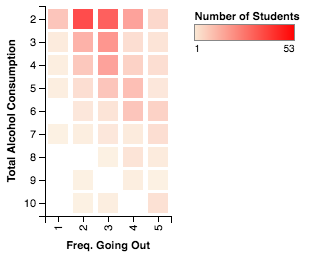

In [14]:
Chart(students).mark_bar().encode(
    Y('Talc:O', title='Total Alcohol Consumption', sort=SortField(field='Talc', order='descending')),
    Color('count(*)', title='Number of Students', scale=Scale(range=['#faebd7', 'red'])),
    X('goout:O', title='Freq. Going Out')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

The majority of students go out 2-3 times and drink 2-4 drinks. The more a student goes out the more they are likely to drink more as seen in the negatively sloping trend of color.

In the next cell, create a visualization that helps answers the following question:

> What is the relationship between time spent studying and total alcohol usage? 

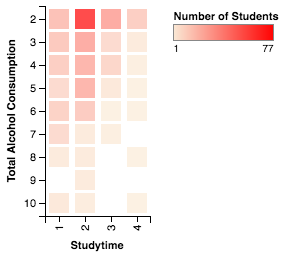

In [15]:
Chart(students).mark_bar().encode(
    Y('Talc:O', title='Total Alcohol Consumption', sort=SortField(field='Talc', order='descending')),
    Color('count(*)', title='Number of Students', scale=Scale(range=['#faebd7', 'red'])),
    X('studytime:O', title='Studytime')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

Most students study for 2 hours and drink anywhere from 2 to 6 drinks. Those that study more than 2 hours are less likely to have 6 drinks in an entire week.

## What things are correlated with getting good grades?

In the next cell, create a visualization that helps answers the following question:

> How do student's plans to attend higher education correlate with their grades?

In [16]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Talc'],
      dtype='object')

In [17]:
students['higher'].head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: higher, dtype: object

In [18]:
students['gpa'] = (students.G1 + students.G2 + students.G3) / 3
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Talc', 'gpa'],
      dtype='object')

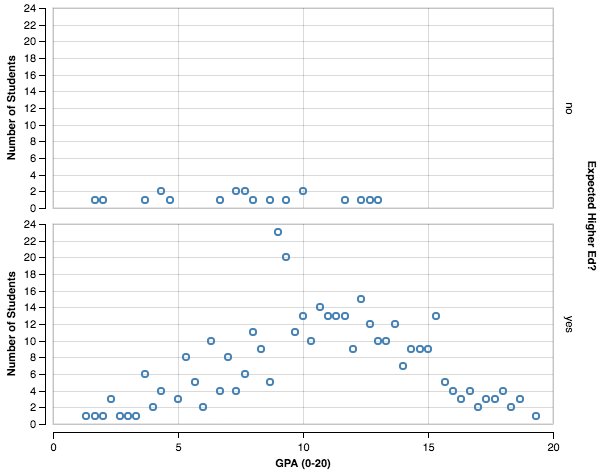

In [19]:
Chart(students).mark_point().encode(
    X('gpa', title='GPA (0-20)'),
    Row('higher', title='Expected Higher Ed?'),
    Y('count(*):Q', title='Number of Students')
).configure_cell(height=200)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

Regardless of grades, most students expect to go on to higher education. In fact, every student above a 13.0 gpa expects to go on to higher education.

In the next cell, create a visualization that helps answers the following question:

> Does a student's mothers education show covariation with their grades?

In [20]:
students['Medu'].head()

0    4
1    1
2    1
3    4
4    3
Name: Medu, dtype: int64

In [21]:
'''Chart(students).mark_point().encode(
    X('gpa', title='GPA (0-20)'),
    Color('Medu:N', title='Mother\'s level of education'),
    Y('count(*):Q', title='Number of Students', sort=SortField(field='gpa', op='sum', order='ascending'))
)'''

"Chart(students).mark_point().encode(\n    X('gpa', title='GPA (0-20)'),\n    Color('Medu:N', title='Mother's level of education'),\n    Y('count(*):Q', title='Number of Students', sort=SortField(field='gpa', op='sum', order='ascending'))\n)"

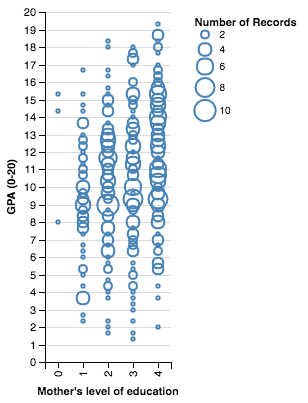

In [22]:
Chart(students).mark_point().encode(
    Y('gpa', title='GPA (0-20)', axis=Axis(ticks=20)),
    X('Medu:O', title='Mother\'s level of education'),
    Size('count(*)')
)

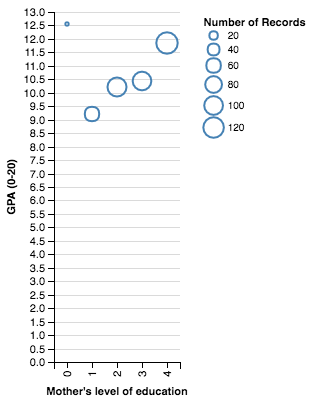

In [23]:
Chart(students).mark_point().encode(
    Y('average(gpa)', title='GPA (0-20)', axis=Axis(ticks=20)),
    X('Medu:O', title='Mother\'s level of education'),
    Size('count(*)')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

It appears that as a student's mother's education level increases, so does their GPA.